In [55]:
# Load the prepared dataset
import pandas as pd

df = pd.read_csv("wordle_difficulty_data.csv")
df.head()

,word,frequency,vowel_count,rare_letter_count,has_duplicates,difficulty
0,rossa,1.820000e-07,2,0,True,Hard
1,jetty,1.100000e-06,1,1,True,Hard
2,wizzo,0.000000e+00,2,2,True,Hard
3,cuppa,5.010000e-07,2,0,True,Hard
4,cohoe,0.000000e+00,3,0,True,Hard


In [56]:
#encoding T/F to 0/1
df["has_duplicates"] = df["has_duplicates"].astype(int)

#Features and label
X = df[["frequency", "vowel_count", "rare_letter_count", "has_duplicates"]]
y = df["difficulty"]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [58]:
#Training the RF classifier
from sklearn.ensemble import RandomForestClassifier as RFC

model = RFC(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
#evaluate the model

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Classification report:               precision    recall  f1-score   support

        Easy       1.00      1.00      1.00        39
        Hard       1.00      1.00      1.00      2761
      Medium       1.00      1.00      1.00       171

    accuracy                           1.00      2971
   macro avg       1.00      1.00      1.00      2971
weighted avg       1.00      1.00      1.00      2971

Confusion matrix: [[  39    0    0]
 [   0  171    0]
 [   0    0 2761]]


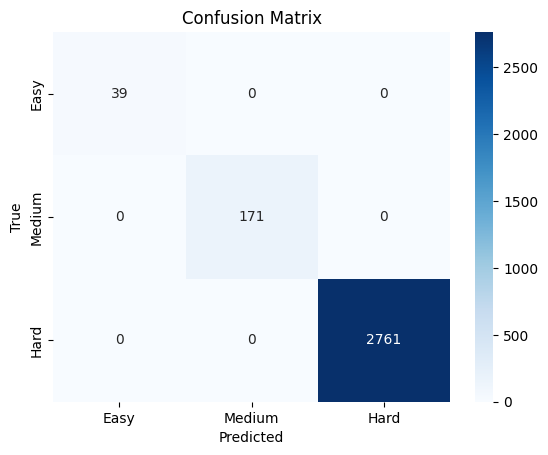

In [60]:

y_pred = model.predict(X_test)
clf_rep = classification_report(y_test, y_pred)
print(f"Classification report: {clf_rep}")

cm = confusion_matrix(y_test, y_pred, labels = ["Easy", "Medium", "Hard"])
print(f"Confusion matrix: {cm}")

#Plot it
sns.heatmap(cm, annot=True, fmt='d', xticklabels = ['Easy', 'Medium', 'Hard'],
            yticklabels = ['Easy', 'Medium', 'Hard'], cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Deploy on streamlit

In [65]:
#deployment prep
import pickle

#Save our model
with open("wordle_model.pkl", "wb") as f:
    pickle.dump(model, f)

#Save explainer
with open("explainer.pkl", "wb") as f:
    pickle.dump(explainer, f)

#Save column order
with open("X_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)